In [1]:
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import matplotlib.dates as mdates
from matplotlib.dates import date2num
import matplotlib.ticker as mticker
from mpl_finance import candlestick_ohlc
import numpy as np
import datetime as dt
from matplotlib import style


In [2]:
tsla = pdr.DataReader('tsla', data_source='yahoo', start='2018-1-1') 
tsla.reset_index(inplace=True)
tsla.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
332,2019-04-30,244.210007,237.000000,242.059998,238.690002,9464600,238.690002
333,2019-05-01,240.000000,231.500000,238.850006,234.009995,10704400,234.009995
334,2019-05-02,247.130005,237.720001,245.520004,244.100006,18159300,244.100006
335,2019-05-03,256.609985,243.490005,243.860001,255.029999,23706800,255.029999
336,2019-05-06,258.350006,248.500000,250.020004,255.339996,10823300,255.339996


In [3]:
def bytespdate2num(fmt, encoding='utf-8'):
    str_converter = mdates.strpdate2num(fmt)
    def bytes_converter(b):
        s = b.decode(encoding)
        return str_converter(s)
    return bytes_converter

    
date_conv = np.vectorize(dt.datetime.fromtimestamp)    

In [4]:
date = tsla.loc[:, 'Date'].values
date = date2num(date)
openp = tsla.loc[:, 'Open'].values
highp = tsla.loc[:, 'High'].values
lowp = tsla.loc[:, 'Low'].values
closep = tsla.loc[:,'Close'].values
volume = tsla.loc[:, 'Volume'].values

x = 0
y = len(date)
new_list = []
while x<y:
    append_line = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
    new_list.append(append_line)
    x += 1

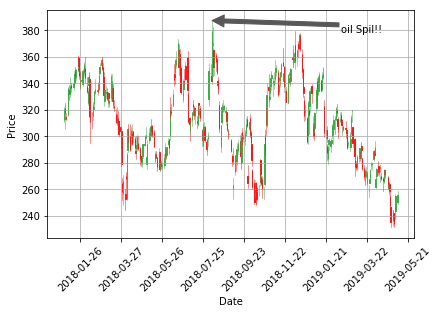

In [11]:
fig = plt.figure()
ax1 = plt.subplot2grid((1,1),(0,0))
plt.ylabel('Price')
plt.xlabel('Date')


candlestick_ohlc(ax1, new_list, width=.6, colorup='#41ad49', colordown='#ff1717')
ax1.grid(True) #, color = 'm', linestyle='-',linewidth=0.3)

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)
    
ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
ax1.annotate('oil Spil!!', (date[150], highp[150]),
            xytext=(0.8, 0.9), textcoords='axes fraction',
            arrowprops=dict(facecolor="#585858", color="#585858"))

plt.subplots_adjust(left=0.09, bottom=.16, right=.94, top=.95, wspace=.2,hspace=.2)
plt.show()

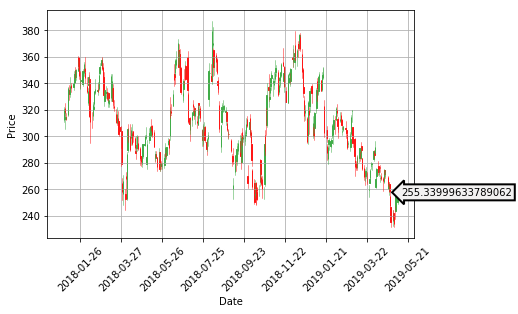

In [17]:
fig = plt.figure()
ax1 = plt.subplot2grid((1,1),(0,0))
plt.ylabel('Price')
plt.xlabel('Date')


candlestick_ohlc(ax1, new_list, width=.6, colorup='#41ad49', colordown='#ff1717')
ax1.grid(True) #, color = 'm', linestyle='-',linewidth=0.3)

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)
    
ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
#dynamic
bbox_props = dict(boxstyle='larrow, pad=0.3', fc="#f2f1f1", ec='k', lw=2)
ax1.annotate(str(closep[-1]), (date[-1], closep[-1]),
            xytext = (date[-1]+5, closep[-1]), bbox = bbox_props)
#https://matplotlib.org/users/annotations.html

plt.subplots_adjust(left=0.09, bottom=.16, right=.94, top=.95, wspace=.2,hspace=.2)
plt.show()